In [19]:
suppressPackageStartupMessages(source("/Users/klagattu/Downloads/tcrpheno_analysis_github/utils.R"))
setwd("/Users/klagattu/Downloads/tcrpheno_analysis_github/data")

## Figure 1a

Joining, by = "X"


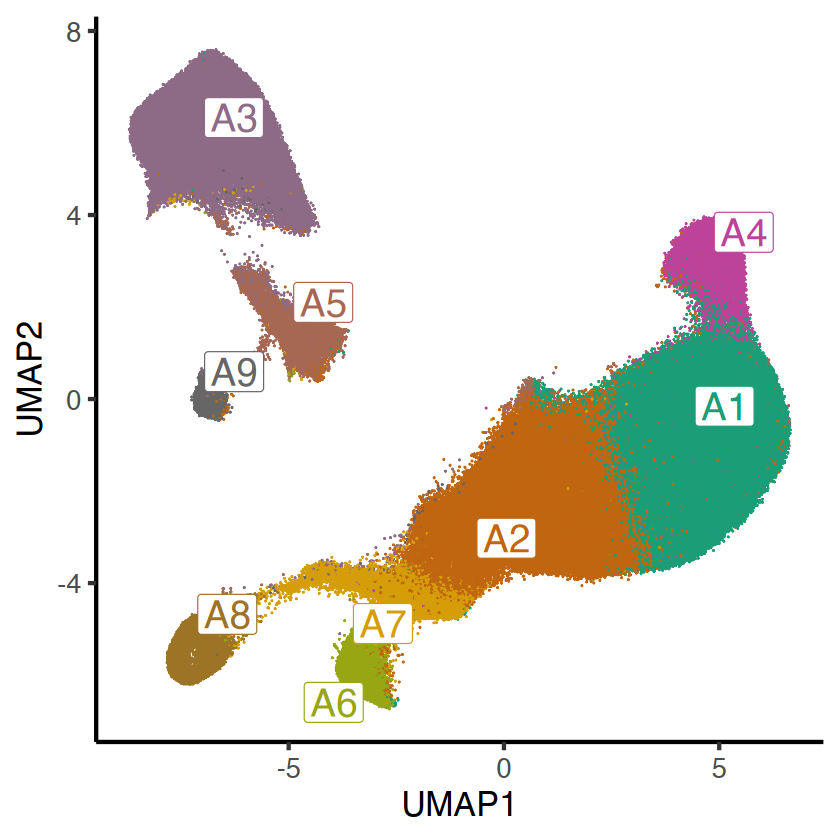

In [3]:
sref = readRDS("sref_combat_full_authTplusNKT_20hPCs_tcrfilt0607_nvargenes200_sampTH1.instTH0.5.poolTH0.5_origuwot.rds")
md = sref$meta_data
md$UMAP1 = sref$umap$embedding[,1]
md$UMAP2 = sref$umap$embedding[,2]
clust = readRDS("metadata_moreclust2_combat_full_authTplusNKT_20hPCs_tcrfilt0607_nvargenes200_sampTH1.instTH0.5.poolTH0.5.rds")
md = left_join(md, clust[,c("X", "cl0.5")])
md = label_invariants(md)
md$clust = paste("A", as.numeric(as.character(md$cl0.5))+1, sep="")
my_cluster_umap(md, "clust")

## Figure 1b

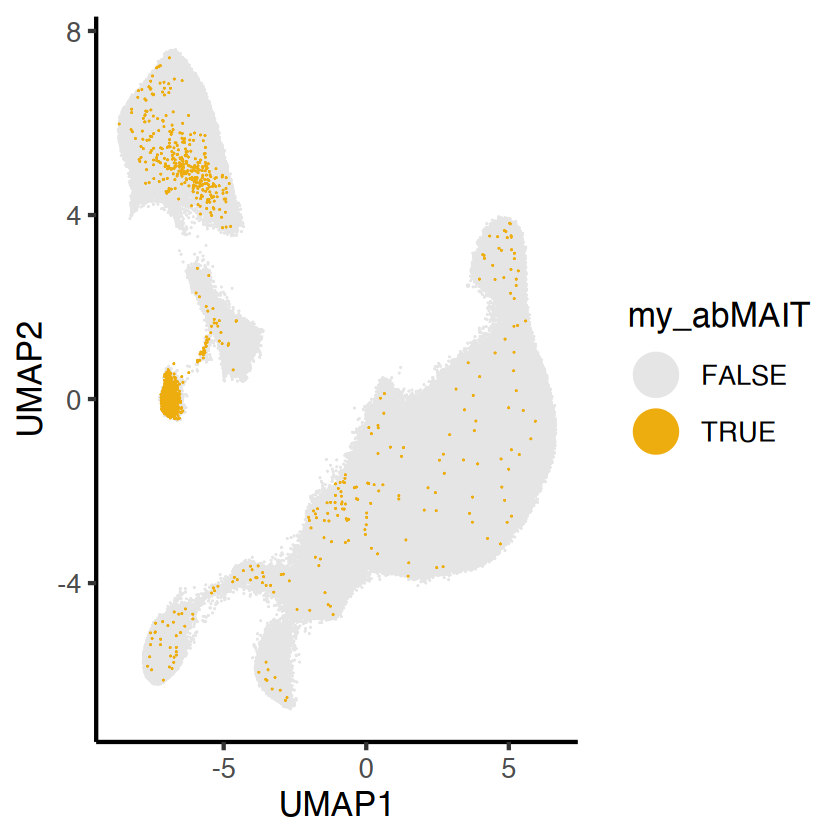

In [11]:
g = ggplot(md[order(md$my_abMAIT),], aes(UMAP1, UMAP2, color=my_abMAIT))
g = g + scale_color_manual(values=c("gray90", "darkgoldenrod2"))
my_umap_theme(g, aes=12)

## Figure 1c

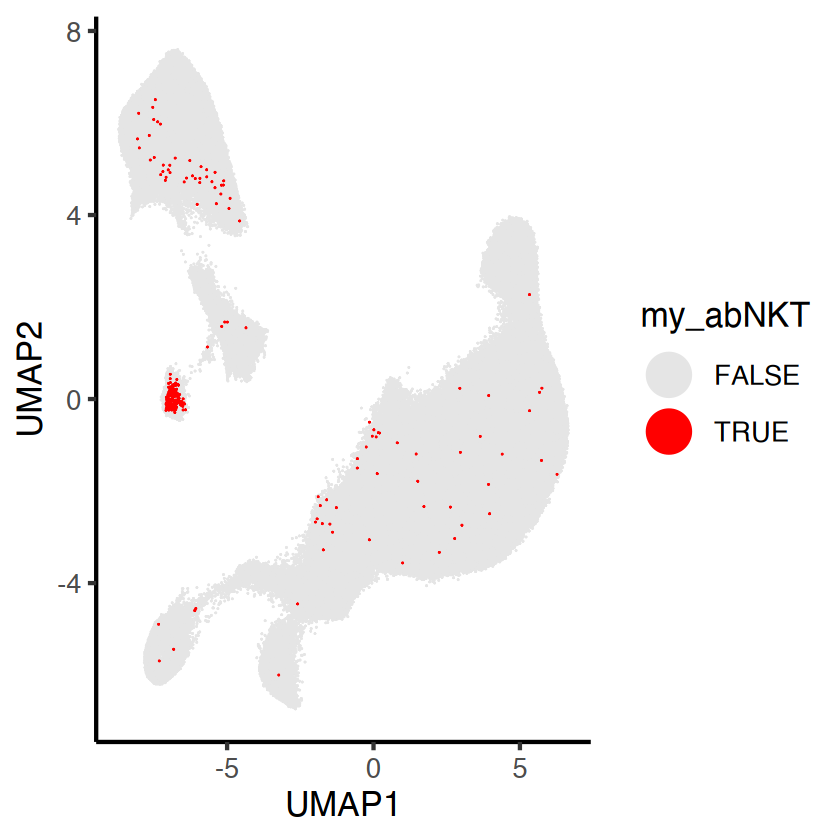

In [12]:
g = ggplot(md[order(md$my_abNKT),], aes(UMAP1, UMAP2, color=my_abNKT))
g = g + scale_color_manual(values=c("gray90", "red"))
my_umap_theme(g, aes=12)

## Figure 1d

`summarise()` has grouped output by 'COMBAT_ID'. You can override using the `.groups` argument.


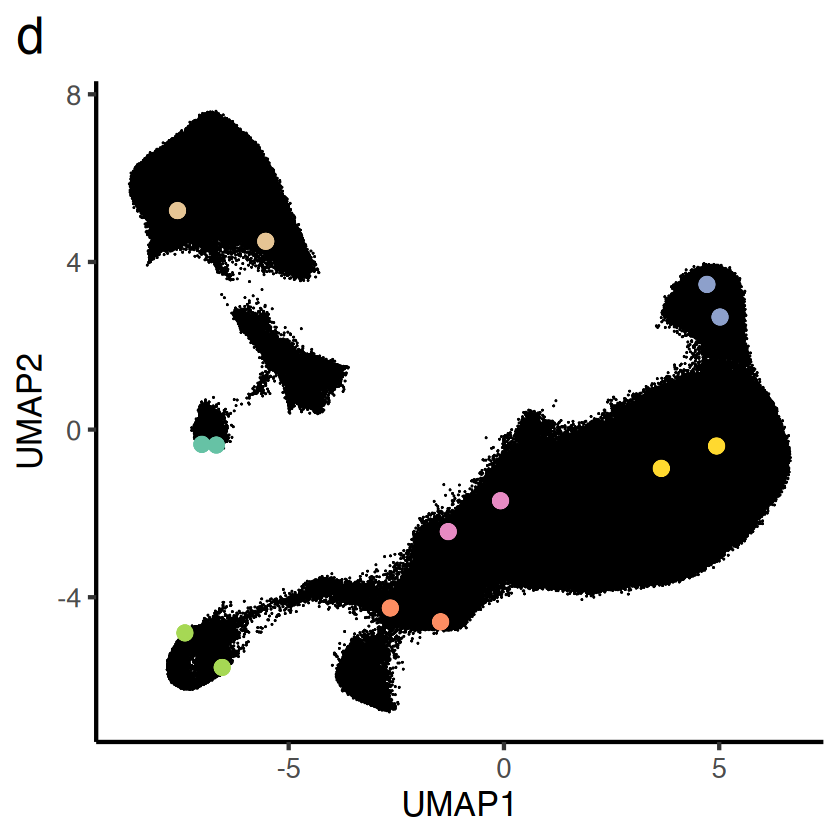

In [18]:
tcr_info = process_tcr_info()
md = left_join(md, tcr_info[,c("barcode_id", "clonotype")], by=c("X"="barcode_id"))
highlight_twins(md, tcr_info)

## Figure 1e

`summarise()` has grouped output by 'COMBAT_ID'. You can override using the `.groups` argument.



	Exact binomial test

data:  sum(clustdf$obs) and nrow(tt)/2
number of successes = 80, number of trials = 115, p-value < 2.2e-16
alternative hypothesis: true probability of success is greater than 0.2165559
95 percent confidence interval:
 0.6174432 1.0000000
sample estimates:
probability of success 
             0.6956522 

[1] 6.137422e-28


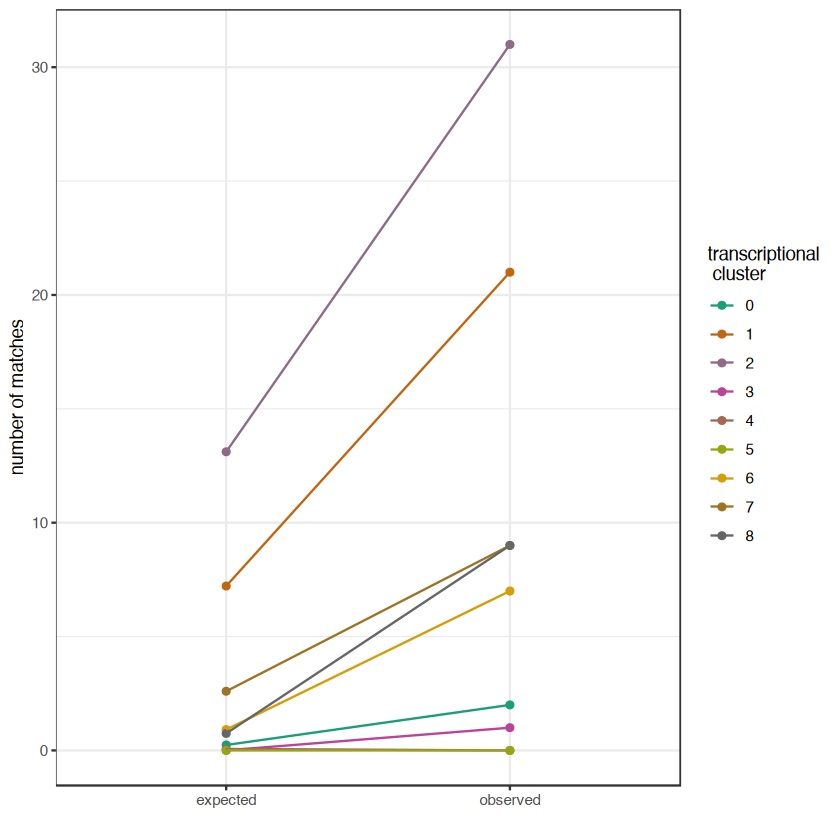

In [20]:
twin_res1 = twin_analysis(tcr_info)
twin_res1$lineplot

`summarise()` has grouped output by 'COMBAT_ID'. You can override using the `.groups` argument.



	Exact binomial test

data:  sum(clustdf$obs) and nrow(tt)/2
number of successes = 35, number of trials = 53, p-value = 4.024e-09
alternative hypothesis: true probability of success is greater than 0.2715184
95 percent confidence interval:
 0.5390458 1.0000000
sample estimates:
probability of success 
             0.6603774 

[1] 4.024196e-09


$twin_tcrs
# A tibble: 106 × 5
# Groups:   COMBAT_ID [61]
   COMBAT_ID clonotype                                 ncells nstates mode_state
   <chr>     <chr>                                      <int>   <int> <chr>     
 1 G05061    TRAV12-2*01 TRA_CAVNRAAGNKLTF TRAJ17*01 …      1       1 1         
 2 G05064    TRAV30*01 TRA_CGTGSQGGSEKLVF TRAJ57*01  …      1       1 1         
 3 G05073    TRAV29/DV5*01 TRA_CAASARNNAGNMLTF TRAJ39…      1       1 4         
 4 G05077    TRAV16*01 TRA_CALGGSNYKLTF TRAJ53*01   -…      1       1 6         
 5 G05097    TRAV41*01 TRA_CAVNNARLMF TRAJ31*01   -TR…      1       1 1         
 6 G05105    TRAV39*01 TRA_CAVDSGGTSYGKLTF TRAJ52*01 …      1       1 0         
 7 G05145    TRAV17*01 TRA_CATTQGGSEKLVF TRAJ57*01   …      1       1 1         
 8 G05145    TRAV26-1*01 TRA_CIVRVDNYGQNFVF TRAJ26*01…      1       1 0         
 9 G05145    TRAV8-1*01 TRA_CAVNTDKLIF TRAJ34*01   -T…      1       1 1         
10 G05164    TRAV2*01 TRA_CAVNNAGNMLTF TRAJ39*01   

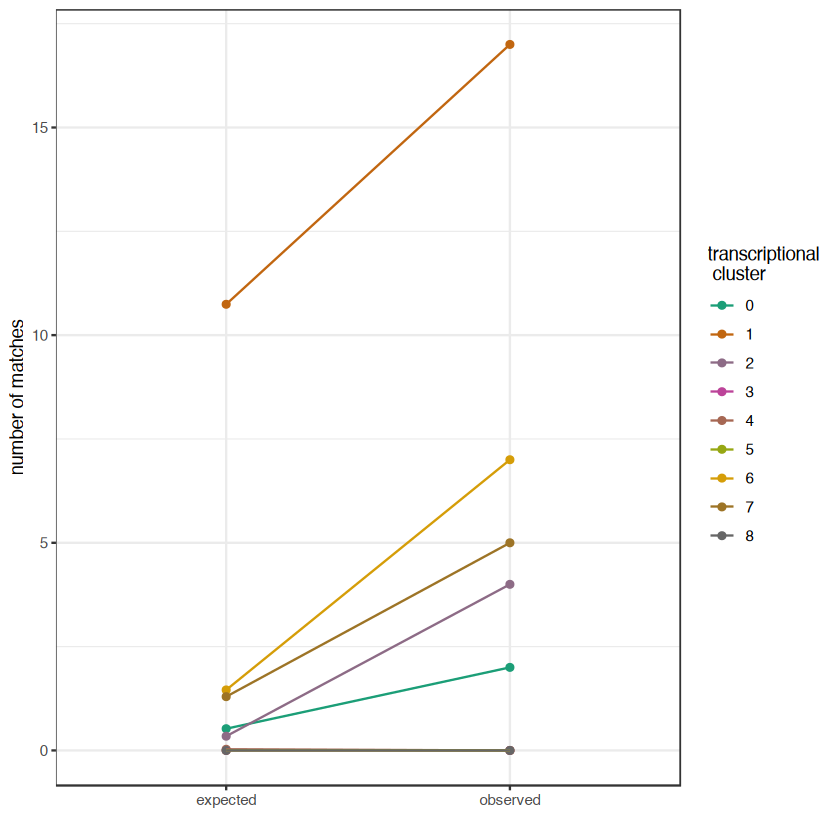

In [22]:
twin_analysis(tcr_info, T_subset="CD4")

`summarise()` has grouped output by 'COMBAT_ID'. You can override using the `.groups` argument.



	Exact binomial test

data:  sum(clustdf$obs) and nrow(tt)/2
number of successes = 25, number of trials = 32, p-value = 0.0001791
alternative hypothesis: true probability of success is greater than 0.4558532
95 percent confidence interval:
 0.6281009 1.0000000
sample estimates:
probability of success 
               0.78125 

[1] 0.0001791053


$twin_tcrs
# A tibble: 64 × 5
# Groups:   COMBAT_ID [42]
   COMBAT_ID clonotype                                 ncells nstates mode_state
   <chr>     <chr>                                      <int>   <int> <chr>     
 1 G05112    TRAV12-1*01 TRA_CVVIRRGANNLFF TRAJ36*01 …      5       1 2         
 2 G05112    TRAV17*01 TRA_CATEANFGNEKLTF TRAJ48*01  …      7       1 2         
 3 G05164    TRAV13-1*01 TRA_CAASEGYKLSF TRAJ20*01   …      1       1 2         
 4 H00049    TRAV25*01 TRA_CAGSGAGSYQLTF TRAJ28*01   …      1       1 2         
 5 H00053    TRAV16*01 TRA_CALRGAQKLVF TRAJ54*01   -T…      2       1 1         
 6 H00067    TRAV26-2*01 TRA_CILPLAGGTSYGKLTF TRAJ52*…     11       2 2         
 7 H00070    TRAV10*01 TRA_CVVSALGGNNRLAF TRAJ7*01   …    412       3 2         
 8 H00085    TRAV25*01 TRA_CAGSGAGSYQLTF TRAJ28*01   …      1       1 2         
 9 H00085    TRAV41*01 TRA_CAVRSQGGSEKLVF TRAJ57*01  …      5       1 2         
10 N00006    TRAV13-1*01 TRA_CAASINQGGKLIF TRAJ23*01

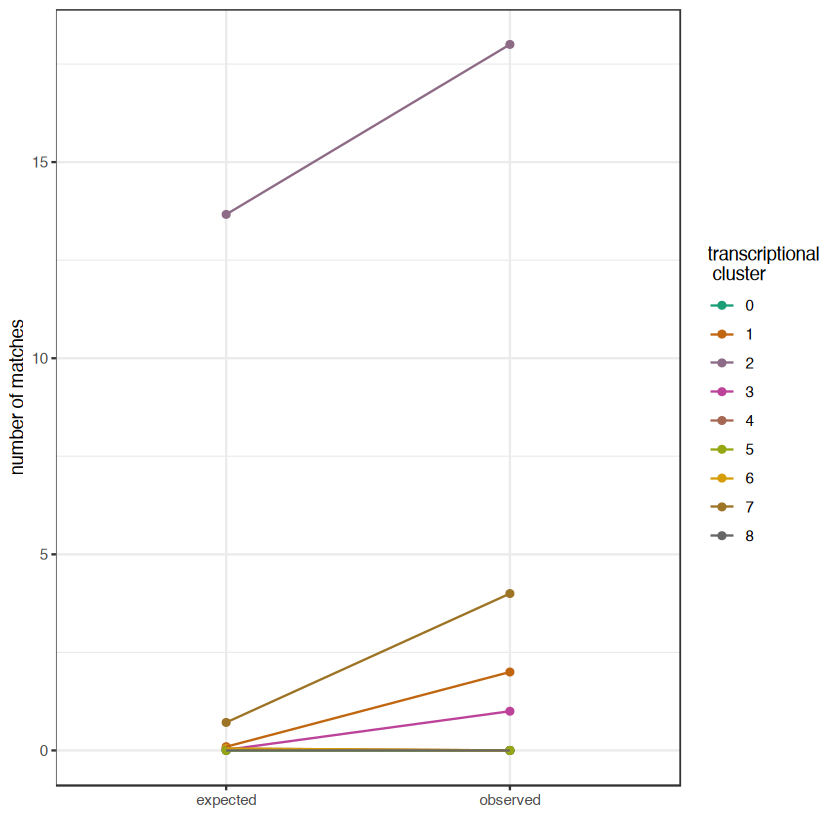

In [23]:
twin_analysis(tcr_info, T_subset="CD8")

`summarise()` has grouped output by 'COMBAT_ID'. You can override using the `.groups` argument.



	Exact binomial test

data:  sum(clustdf$obs) and nrow(tt)/2
number of successes = 13, number of trials = 16, p-value = 0.0004802
alternative hypothesis: true probability of success is greater than 0.3770161
95 percent confidence interval:
 0.5834277 1.0000000
sample estimates:
probability of success 
                0.8125 

[1] 0.0004801847


$twin_tcrs
# A tibble: 32 × 5
# Groups:   COMBAT_ID [20]
   COMBAT_ID clonotype                                 ncells nstates mode_state
   <chr>     <chr>                                      <int>   <int> <chr>     
 1 H00049    TRAV12-2*01 TRA_CAVNKAAGNKLTF TRAJ17*01 …      1       1 1         
 2 H00049    TRAV13-1*01 TRA_CAASINQGGKLIF TRAJ23*01 …      1       1 2         
 3 H00049    TRAV16*01 TRA_CALRPGTYKYIF TRAJ40*01   -…      1       1 1         
 4 H00049    TRAV16*01 TRA_CALSGGGANNLFF TRAJ36*01   …      1       1 1         
 5 H00049    TRAV25*01 TRA_CAGSGAGSYQLTF TRAJ28*01   …      1       1 2         
 6 H00052    TRAV1-2*01 TRA_CAVMDSNYQLIW TRAJ33*01   …      1       1 8         
 7 H00052    TRAV16*01 TRA_CALSGGGANNLFF TRAJ36*01   …      1       1 1         
 8 H00054    TRAV1-2*01 TRA_CAVRDSNYQLIW TRAJ33*01   …      1       1 8         
 9 H00058    TRAV10*01 TRA_CVVTEDSNYQLIW TRAJ33*01   …      1       1 2         
10 H00067    TRAV12-2*01 TRA_CAVNKAAGNKLTF TRAJ17*01

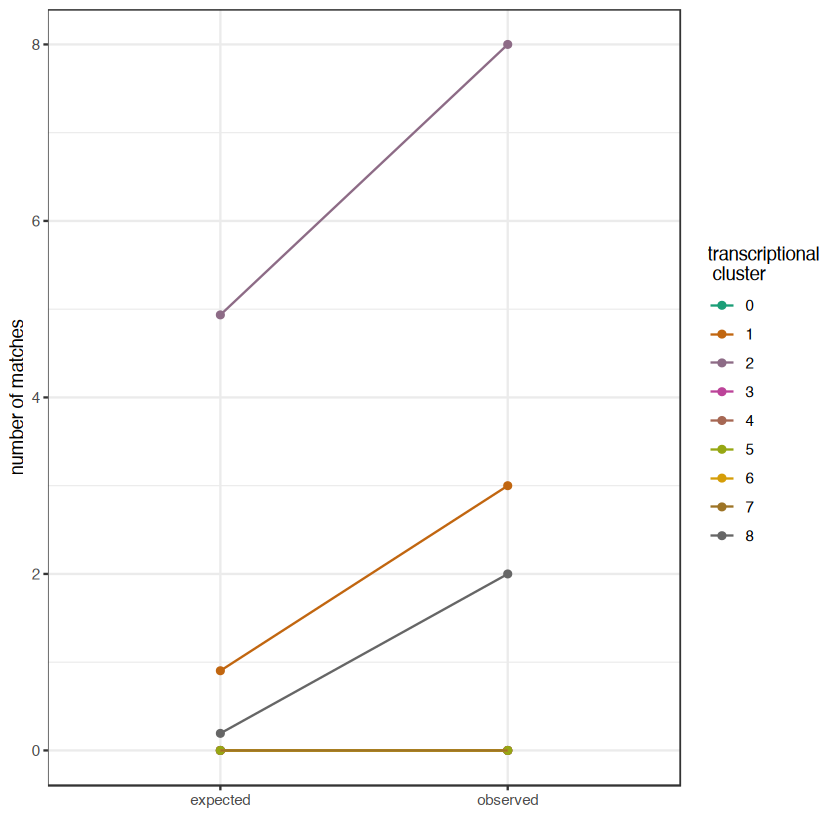

In [24]:
twin_analysis(tcr_info, covid_status="neg")

`summarise()` has grouped output by 'COMBAT_ID'. You can override using the `.groups` argument.



	Exact binomial test

data:  sum(clustdf$obs) and nrow(tt)/2
number of successes = 72, number of trials = 107, p-value < 2.2e-16
alternative hypothesis: true probability of success is greater than 0.2382081
95 percent confidence interval:
 0.5906281 1.0000000
sample estimates:
probability of success 
             0.6728972 

[1] 2.304488e-21


$twin_tcrs
# A tibble: 214 × 5
# Groups:   COMBAT_ID [87]
   COMBAT_ID clonotype                                 ncells nstates mode_state
   <chr>     <chr>                                      <int>   <int> <chr>     
 1 G05061    TRAV12-2*01 TRA_CAVNRAAGNKLTF TRAJ17*01 …      1       1 1         
 2 G05061    TRAV30*01 TRA_CGTESTGANNLFF TRAJ36*01   …      1       1 2         
 3 G05064    TRAV30*01 TRA_CGTGSQGGSEKLVF TRAJ57*01  …      1       1 1         
 4 G05073    TRAV19*01 TRA_CALINNYGQNFVF TRAJ26*01   …    137       2 2         
 5 G05073    TRAV29/DV5*01 TRA_CAASARNNAGNMLTF TRAJ39…      1       1 4         
 6 G05077    TRAV16*01 TRA_CALGGSNYKLTF TRAJ53*01   -…      1       1 6         
 7 G05078    TRAV8-3*01 TRA_CAVALNNDMRF TRAJ43*01   -…     16       2 2         
 8 G05097    TRAV41*01 TRA_CAVNNARLMF TRAJ31*01   -TR…      1       1 1         
 9 G05105    TRAV12-2*01 TRA_CAVLGGSQGNLIF TRAJ42*01 …      4       1 2         
10 G05105    TRAV39*01 TRA_CAVDSGGTSYGKLTF TRAJ52*0

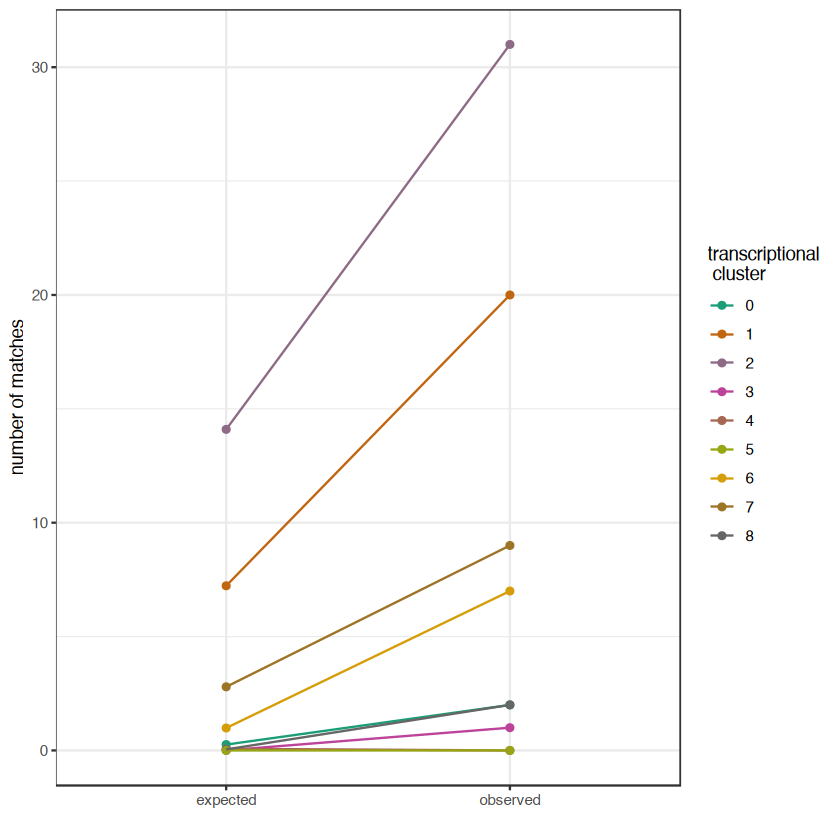

In [25]:
twin_analysis(tcr_info[!(tcr_info$barcode_id %in% md$X[md$my_abMAIT==TRUE | md$my_abNKT==TRUE]),])